In [ ]:
#mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

#set repo path and check repo status
repo_path = '/content/drive/MyDrive/shape-recognition/'
%cd /content/drive/MyDrive/shape-recognition/
!git status

In [1]:
#initialize environment, load modules/libraries

import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

#import python code from seperate files
from utils.generators import gen_shapes, gen_lines, gen_ellipses, gen_images, gen_details
from utils.helpers import gen_grid_image

In [2]:
rnd=np.random.default_rng(31)

folder=["train","validate","test"]
num_images={"train":1000, "validate":100, "test":100}

num_shapes=50
max_radius=1/20
min_radius=1/40

num_lines=500
max_len=1/10
min_len=1/80

num_ellipses=120
max_diam=1/6
min_diam=1/80

im_size=1024
max_lw=0.5
min_lw=0.1
min_gray=0.7

radius = int(max_radius*im_size)+1
detail_im_size = 2*radius+1

fluct=0

In [ ]:
#generate random figures and lines and ellipses, and save in npz

for name in folder:
    for i in range(num_images[name]):
        sha = gen_shapes(rnd, num_shapes, max_radius, min_radius, False, False)
        lns = gen_lines(rnd, num_lines, max_len, min_len)
        eps = gen_ellipses(rnd, num_ellipses, max_diam, min_diam)

        file = name+"/"+name+f"{i:04d}"
        np.savez_compressed("data/raw/"+file+".npz", shapes=sha, lines=lns, ellipses=eps)
    plt.close()

In [ ]:
#generate and plot image data and save in jpg and npz

for name in folder:
    for i in range(num_images[name]):
        file = name+"/"+name+f"{i:04d}"
        loaded  = np.load("data/raw/"+file+".npz")
        shapes = loaded['shapes']
        lines = loaded['lines']
        ellipses = loaded['ellipses']

        imgs, sha, box = gen_images(shapes, lines, ellipses, im_size, max_lw, min_lw, min_gray, False)
        focus = gen_details(detail_im_size, sha, imgs, rnd, fluct)

        np.savez_compressed("data/labels/"+file+".npz", shapes=sha, boxes=box)

        for j in range(4):
            target = name+f"-{j}/"+name+f"{i:04d}"
            np.savez_compressed("data/"+target+"-detail.npz", details=focus[j])

            fig = plt.figure(figsize=(im_size,im_size),dpi=1)
            fig.figimage(imgs[j], cmap='gray')
            fig.savefig("data/"+target+".jpg")
            plt.close()
    plt.close()

In [ ]:
#generate box labels and save in xml

for name in folder:
    for i in range(num_images[name]):
        filename = name+f"{i:04d}"
        file = name+"/"+ filename
        loaded  = np.load("data/labels/"+file+".npz")
        shapes = loaded['shapes']
        boxes = loaded['boxes']

        annotation=ET.Element('annotation')
        ET.SubElement(annotation,'folder')
        ET.SubElement(annotation,'filename').text=filename+".jpg"
        ET.SubElement(annotation,'path').text=filename+".jpg"
        ET.SubElement(annotation,'source').text='synthetic'
        ET.SubElement(annotation,'segmented').text='0'
        size=ET.SubElement(annotation,'size')
        ET.SubElement(size,'width').text=f"{im_size}"
        ET.SubElement(size,'height').text=f"{im_size}"
        ET.SubElement(size,'depth').text='1'

        for k in range(num_shapes):
          obj=ET.SubElement(annotation,'object')
          ET.SubElement(obj,'name').text=f"{int(shapes[k][0])}"
          ET.SubElement(obj,'pose').text='Unspecified'
          ET.SubElement(obj,'truncated').text='0'
          ET.SubElement(obj,'difficult').text='0'
          ET.SubElement(obj,'occluded').text='0'
          box=ET.SubElement(obj,'bndbox')
          ET.SubElement(box,'xmin').text=f"{int(boxes[k][0]+0.5)}"
          ET.SubElement(box,'xmax').text=f"{int(boxes[k][1]+0.5)}"
          ET.SubElement(box,'ymin').text=f"{im_size-int(boxes[k][3]+0.5)}"
          ET.SubElement(box,'ymax').text=f"{im_size-int(boxes[k][2]+0.5)}"

        ET.ElementTree(annotation).write("data/labels/"+file+".xml")



data/train-0/train0000.jpg


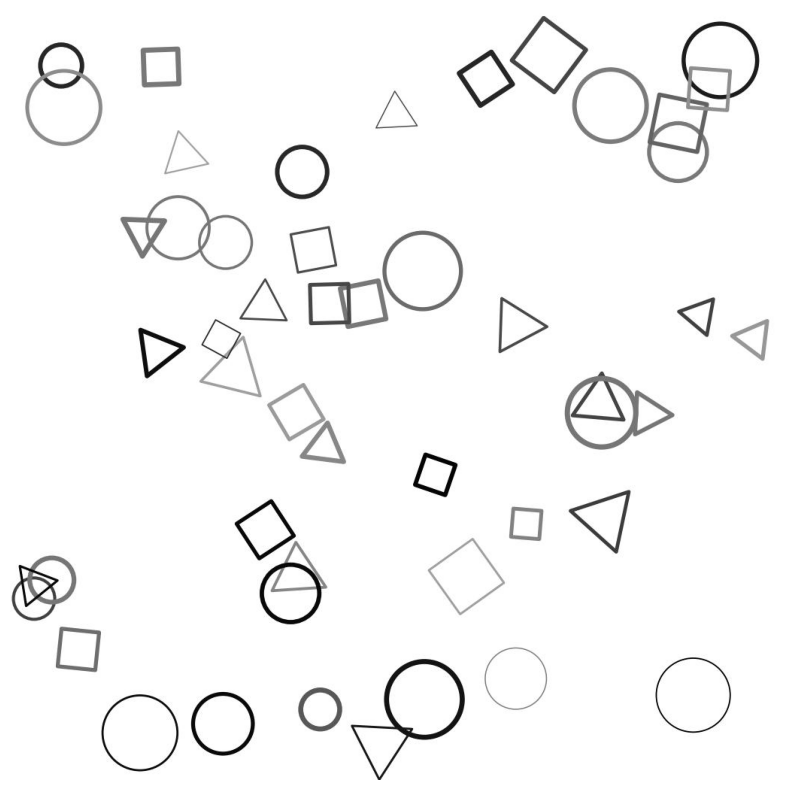





data/train-1/train0000.jpg


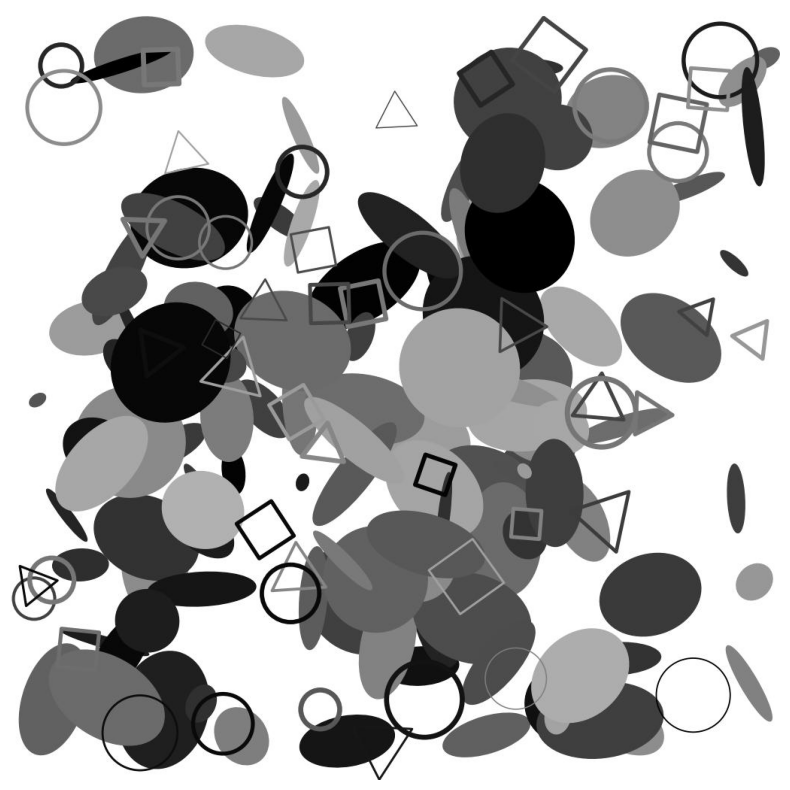





data/train-2/train0000.jpg


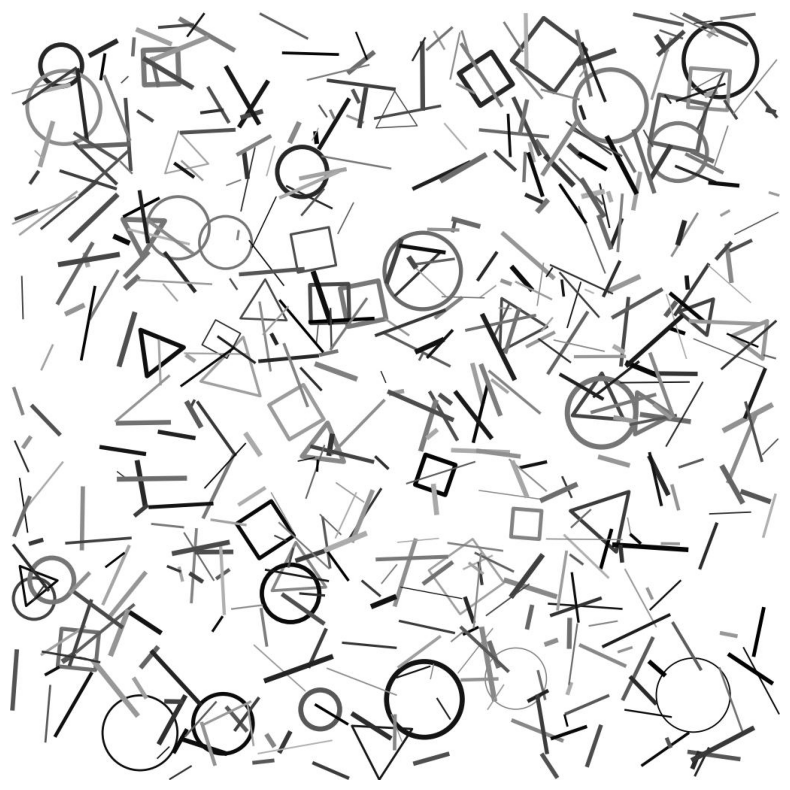





data/train-3/train0000.jpg


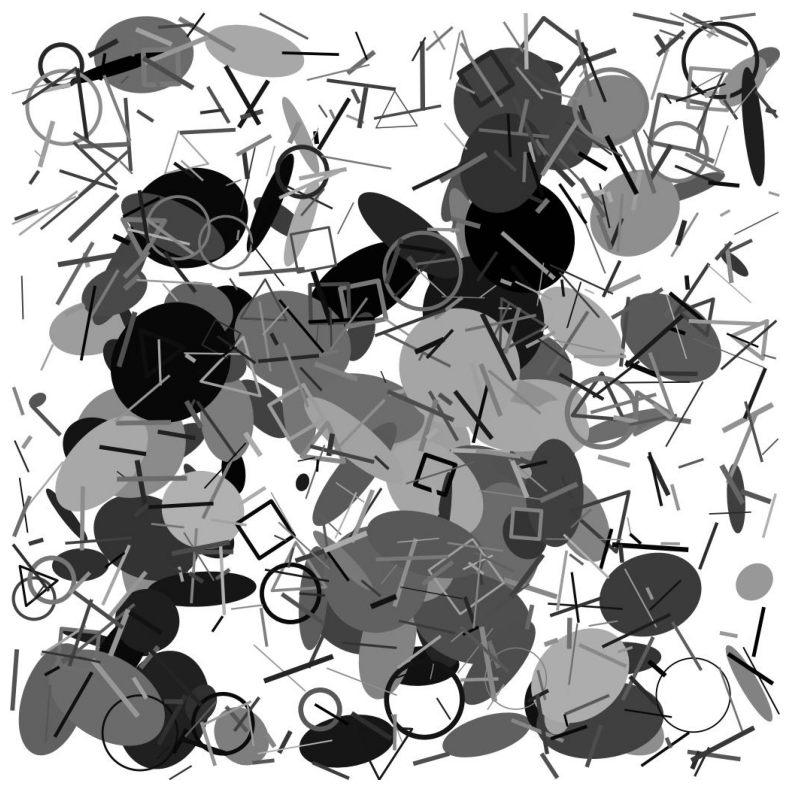

In [5]:
#show different image constructions

name=folder[0]
for j in range(4):
    print('\n')
    plt.figure(figsize=(10,10))
    file = "data/"+name+f"-{j}/"+name+f"{0:04d}.jpg"
    print(file)
    image = plt.imread(file)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    print('\n')



data/details-0.jpg


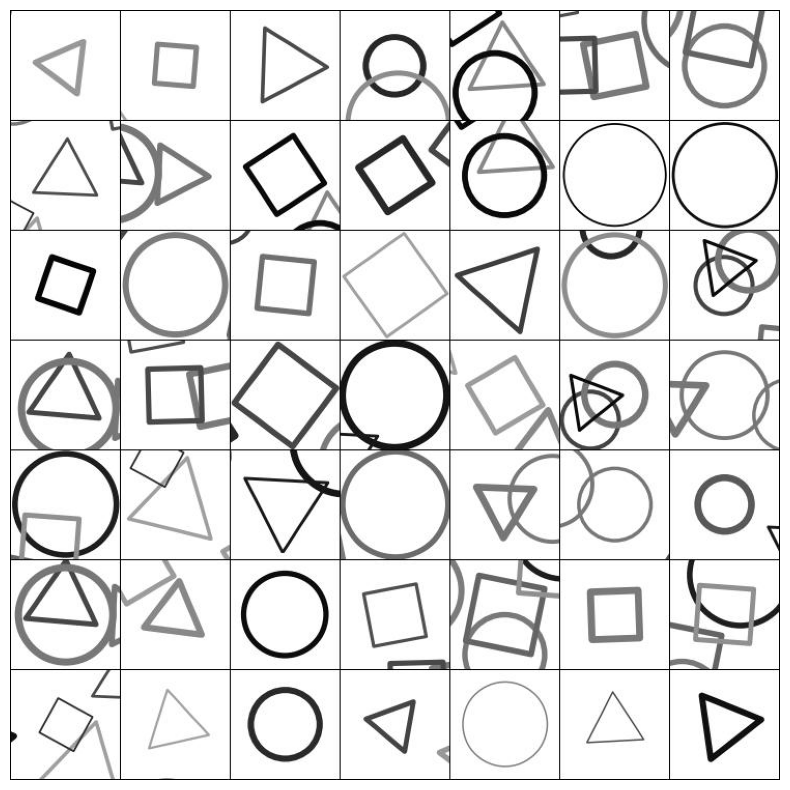





data/details-1.jpg


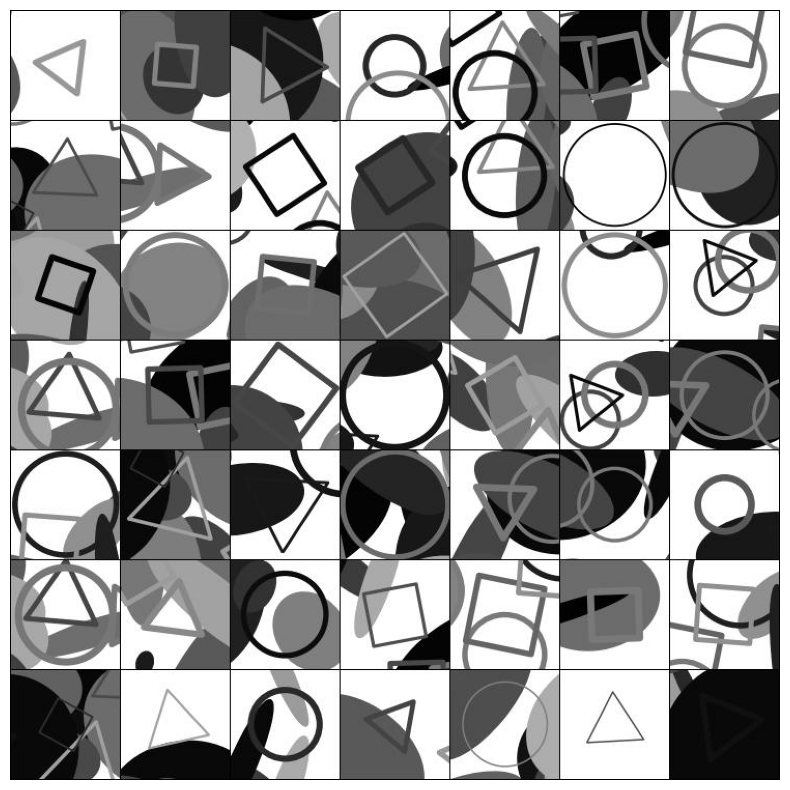





data/details-2.jpg


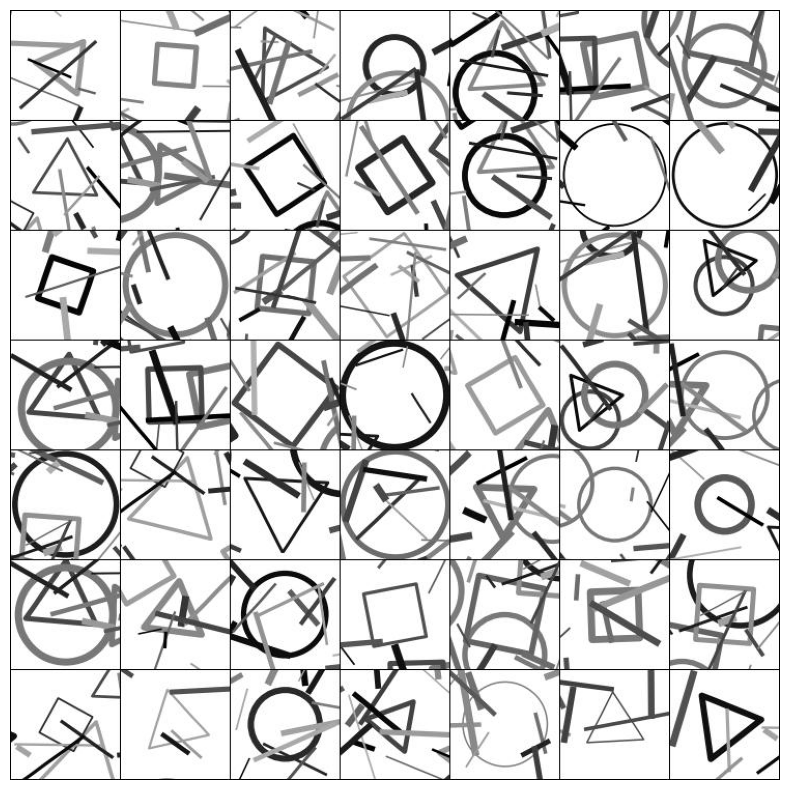





data/details-3.jpg


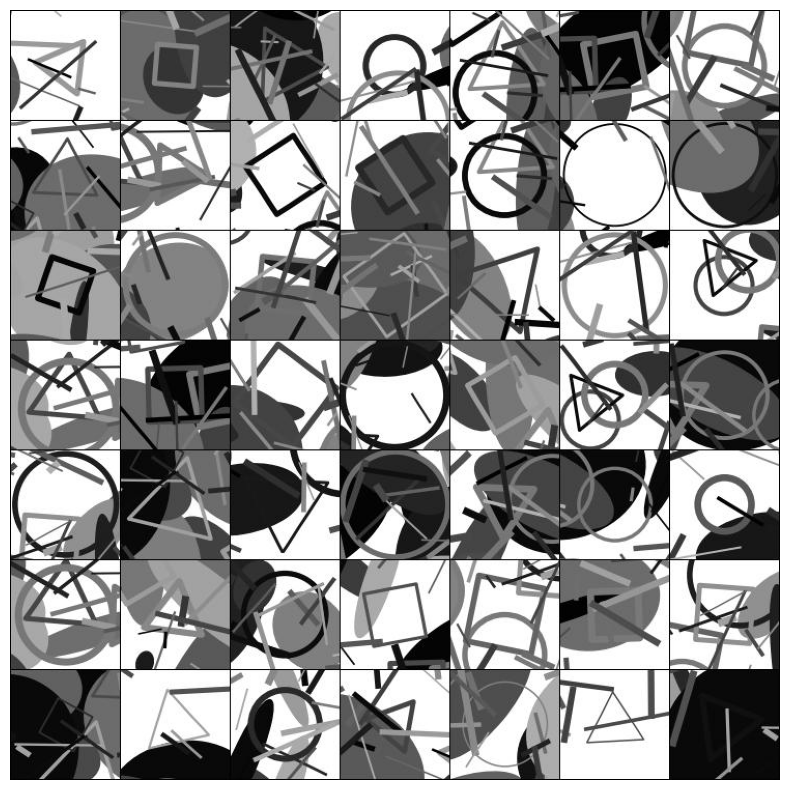

In [6]:
#show shapes in detail

name=folder[0]
grid = (7,7)

for j in range(4):
    file = name+f"-{j}/"+name+f"{0:04d}"
    loaded  = np.load("data/"+file+"-detail.npz")
    details = loaded['details']
    grid_image, grid_pos = gen_grid_image(details, grid)

    fig = plt.figure(figsize=(grid_image.shape[1],grid_image.shape[0]),dpi=1)
    fig.figimage(grid_image, cmap='gray')
    fig.savefig(f'data/details-{j}.jpg')
    plt.close()

for j in range(4):
    print('\n')
    plt.figure(figsize=(10,10))
    file = f'data/details-{j}.jpg'
    print(file)
    image = plt.imread(file)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    print('\n')

In [ ]:
file = name+"/"+name+f"{0:04d}"
loaded  = np.load("data/labels/"+file+".npz")
shapes = loaded['shapes']
boxes = loaded['boxes']

print("\nposition : shape : [pos_x, pos_y, size, rotation, line_width, gray]")
np.set_printoptions(precision=3, suppress=True)
for i in range(grid[0]*grid[1]):
    print(f"{grid_pos[i]} : {int(shapes[i][0])} {shapes[i][1:]}")


position : shape : [pos_x, pos_y, size, rotation, line_width, gray]
(0, 0) : 3 [989.37  587.015  29.232   1.451   0.376   0.854]
(0, 1) : 4 [686.627 340.638  26.644   0.704   0.351   0.734]
(0, 2) : 3 [673.202 604.254  41.08    0.489   0.257   0.418]
(0, 3) : 2 [ 68.085 950.143  27.741   0.      0.417   0.222]
(0, 4) : 3 [382.882 274.745  41.445   0.065   0.27    0.754]
(1, 0) : 4 [469.619 633.414  36.56    0.986   0.446   0.675]
(1, 1) : 2 [888.406 835.028  38.453   0.      0.38    0.682]
(1, 2) : 3 [337.917 630.319  35.581   2.052   0.193   0.42 ]
(1, 3) : 3 [848.7   486.845  32.298   0.474   0.39    0.666]
(1, 4) : 4 [339.474 332.791  38.941   1.364   0.364   0.058]
(2, 0) : 4 [632.837 932.549  36.259   1.368   0.46    0.223]
(2, 1) : 2 [373.117 248.16   38.194   0.      0.408   0.064]
(2, 2) : 2 [908.623 112.858  49.156   0.      0.127   0.013]
(2, 3) : 2 [172.877  62.707  49.798   0.      0.196   0.085]
(2, 4) : 4 [565.625 405.827  29.818   0.455   0.403   0.035]
(3, 0) : 2 [798.

In [ ]:
print("\nposition : [x_min, x_max, y_min, y_max]")
np.set_printoptions(precision=3, suppress=True)
for i in range(grid[0]*grid[1]):
    print(f"{grid_pos[i]} : {boxes[i]}")


position : [x_min, x_max, y_min, y_max]
(0, 0) : [ 960.347 1006.905  560.135  610.404]
(0, 1) : [666.313 706.941 320.324 360.952]
(0, 2) : [651.431 714.257 569.417 640.527]
(0, 3) : [ 40.344  95.826 922.401 977.884]
(0, 4) : [348.42  420.051 251.723 316.101]
(1, 0) : [439.132 500.106 602.927 663.901]
(1, 1) : [849.953 926.859 796.575 873.481]
(1, 2) : [306.375 367.947 611.236 665.868]
(1, 3) : [831.19  880.959 459.705 515.579]
(1, 4) : [301.36  377.588 294.677 370.905]
(2, 0) : [597.317 668.357 897.03  968.069]
(2, 1) : [334.923 411.311 209.966 286.354]
(2, 2) : [859.467 957.78   63.702 162.015]
(2, 3) : [123.079 222.675  12.909 112.505]
(2, 4) : [538.845 592.405 379.047 432.607]
(3, 0) : [750.681 846.61  848.873 944.802]
(3, 1) : [ 63.391 118.477 146.13  201.215]
(3, 2) : [556.974 656.938 220.573 320.538]
(3, 3) : [745.41  822.972 303.447 383.3  ]
(3, 4) : [ 22.951 120.375 845.664 943.087]
(4, 0) : [  4.544  59.549 213.716 268.722]
(4, 1) : [748.112 816.133 479.094 540.873]
(4, 2) : 